In [33]:
# Import Main libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Import Visualization lib.
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# processing
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [34]:
train_df = pd.read_csv('datasets/train.csv')
test_df = pd.read_csv('datasets/test.csv')

In [35]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
# data Size 
print(f"Train data size is : {train_df.shape}")
print(f"Test data size is : {test_df.shape}")

Train data size is : (891, 12)
Test data size is : (418, 11)


In [37]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

177 null values in age abd 687 null values in cabin

In [38]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [39]:
imputer   = SimpleImputer(missing_values=np.nan, strategy='mean')

In [40]:
train_df['Age'] = imputer.fit_transform(train_df['Age'].values.reshape(-1,1))
train_df['Embarked'] = train_df['Embarked'].ffill()
train_df.drop(['PassengerId', 'Name', 'Cabin'], axis=1, inplace=True) # 3rd

In [41]:
test_df['Age'] = imputer.fit_transform(test_df['Age'].values.reshape(-1,1))
test_df['Embarked'] = test_df['Embarked'].ffill()
test_df.drop(['PassengerId', 'Name', 'Cabin'], axis=1, inplace=True) # 3rd

<Axes: xlabel='Survived', ylabel='count'>

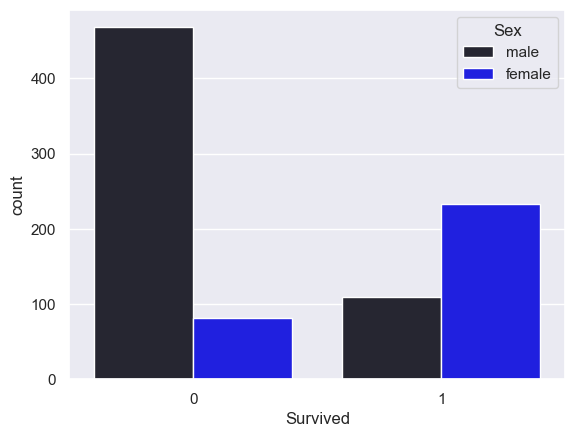

In [45]:
sns.countplot(x='Survived', hue='Sex', data=train_df, palette='dark:blue')

<Axes: xlabel='Embarked', ylabel='count'>

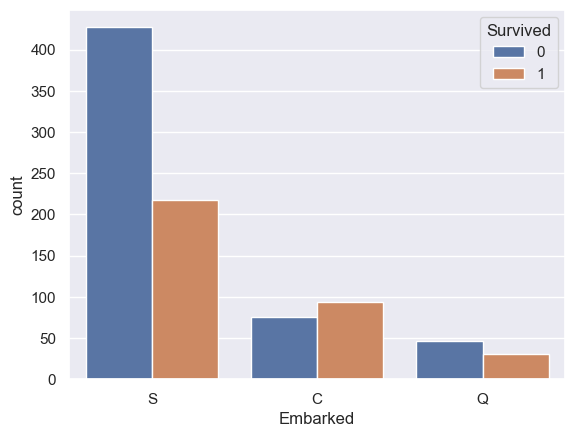

In [46]:
sns.countplot(x='Embarked', hue='Survived', data=train_df)

<Axes: xlabel='SibSp', ylabel='count'>

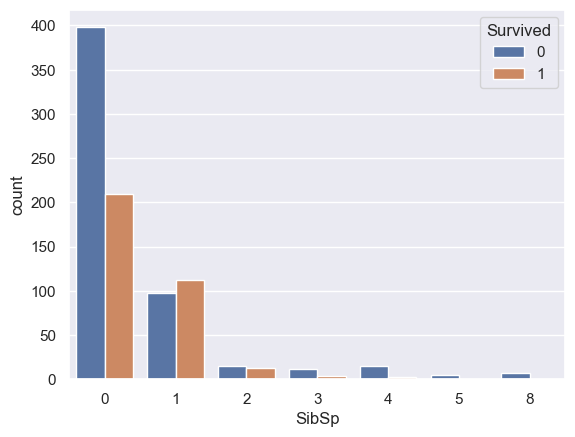

In [47]:
sns.countplot(x='SibSp', hue='Survived', data=train_df)

<Axes: xlabel='Pclass', ylabel='count'>

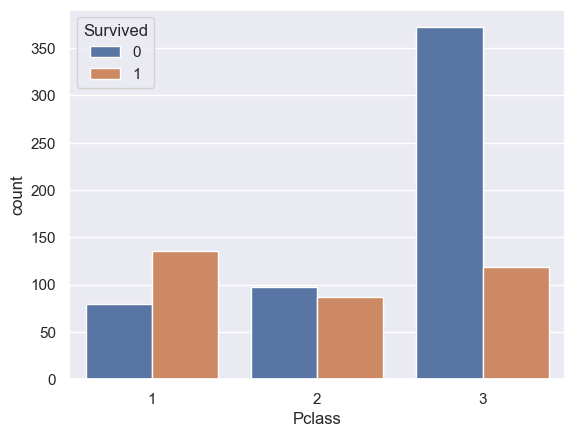

In [48]:
sns.countplot(x='Pclass', hue='Survived', data=train_df)

<Figure size 1000x500 with 0 Axes>

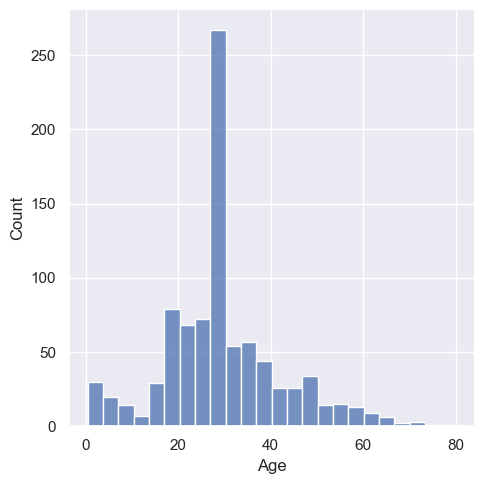

In [51]:
plt.figure(figsize=(10,5))
sns.displot(train_df['Age'], bins=24, color='b')

In [55]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.000000,1,0,113803,53.1000,S
4,0,3,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,211536,13.0000,S
887,1,1,female,19.000000,0,0,112053,30.0000,S
888,0,3,female,29.699118,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.000000,0,0,111369,30.0000,C


In [56]:
# Select numeric columns for correlation calculation
numeric_columns = train_df.select_dtypes(include=np.number).columns

# Calculate correlation matrix for numeric columns
corr_matrix = train_df[numeric_columns].corr()


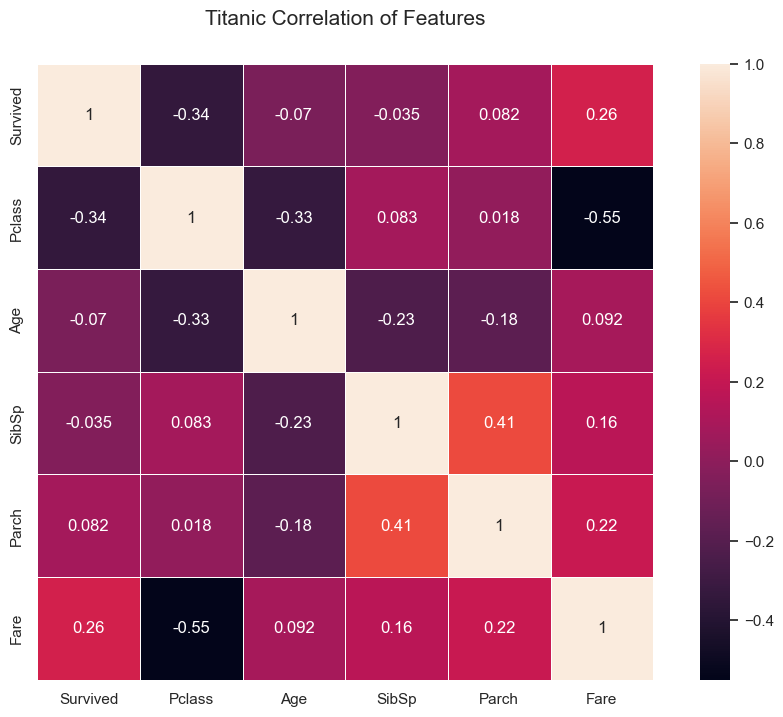

In [61]:
plt.figure(figsize=(12, 8))
plt.title('Titanic Correlation of Features', y=1.05, size=15)
sns.heatmap(corr_matrix, linewidths=0.5, vmax=1.0, 
            square=True, linecolor='white', annot=True)

In [62]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [63]:
objects_cols = train_df.select_dtypes("object").columns
objects_cols

Index(['Sex', 'Ticket', 'Embarked'], dtype='object')

In [64]:
le = LabelEncoder()
train_df[objects_cols] = train_df[objects_cols].apply(le.fit_transform)
test_df[objects_cols] = test_df[objects_cols].apply(le.fit_transform)
train_df[objects_cols].head()

,Sex,Ticket,Embarked
0,1,523,2
1,0,596,0
2,0,669,2
3,0,49,2
4,1,472,2


In [65]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,523,7.2500,2
1,1,1,0,38.0,1,0,596,71.2833,0
2,1,3,0,26.0,0,0,669,7.9250,2
3,1,1,0,35.0,1,0,49,53.1000,2
4,0,3,1,35.0,0,0,472,8.0500,2


In [67]:
# model selection
from sklearn.model_selection import train_test_split, cross_val_score

# normaliztion
from sklearn.preprocessing import StandardScaler

# tree based models
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# classic ml models
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# metrics
from sklearn.metrics import accuracy_score

In [69]:
# Machine Learning 
X = train_df.drop(['Survived'], axis=1).values
y = train_df['Survived'].values

In [71]:
# Split data to 80% training data and 20% of test to check the accuracy of our model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
class Model:
    def __init__(self, model):
        self.model = model
        self.X, self.y = X, y
        self.X_train, self.X_test, self.y_train, self.y_test = X_train, X_test, y_train, y_test
        
        self.train()
    
    def model_name(self):
        model_name = type(self.model).__name__
        return model_name
        
    def cross_validation(self, cv=5):
        print(f"Evaluate {self.model_name()} score by cross-validation...")
        CVS = cross_val_score(self.model, self.X, self.y, scoring='accuracy', cv=cv)
        print(CVS)
        print("="*60, "\nMean accuracy of cross-validation: ", CVS.mean())
    
    def train(self):
        print(f"Training {self.model_name()} Model...")
        self.model.fit(X_train, y_train)
        print("Model Trained.")
        
    def prediction(self, test_x=None, test=False):
        if test == False:
            y_pred = self.model.predict(self.X_test)
        else:
            y_pred = self.model.predict(test_x)
            
        return y_pred
    
    def accuracy(self):
        y_pred = self.prediction()
        y_test = self.y_test
        
        acc = accuracy_score(y_pred, y_test)
        print(f"{self.model_name()} Model Accuracy: ", acc)

In [73]:
xgb = XGBClassifier(random_state=42, n_estimators=222)
xgb = Model(xgb)

xgb.cross_validation()

Training XGBClassifier Model...
Model Trained.
Evaluate XGBClassifier score by cross-validation...
[0.77653631 0.76404494 0.83707865 0.80898876 0.86516854]
Mean accuracy of cross-validation:  0.8103634423451131


In [74]:
xgb.accuracy()

XGBClassifier Model Accuracy:  0.8044692737430168


In [75]:
rfc = RandomForestClassifier(random_state=42)
rfc = Model(rfc)

rfc.cross_validation()

Training RandomForestClassifier Model...
Model Trained.
Evaluate RandomForestClassifier score by cross-validation...
[0.80446927 0.81460674 0.83146067 0.83146067 0.87078652]
Mean accuracy of cross-validation:  0.8305567760969179


In [76]:
rfc.accuracy()

RandomForestClassifier Model Accuracy:  0.8100558659217877


In [78]:
xgb_pred = xgb.prediction(test_x=test_X, test=True)
gnb_pred = gnb.prediction(test_x=test_X, test=True)
rfc_pred = rfc.prediction(test_x=test_X, test=True)

NameError: name 'test_X' is not defined